# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [38]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [16]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Series([], dtype: int64)


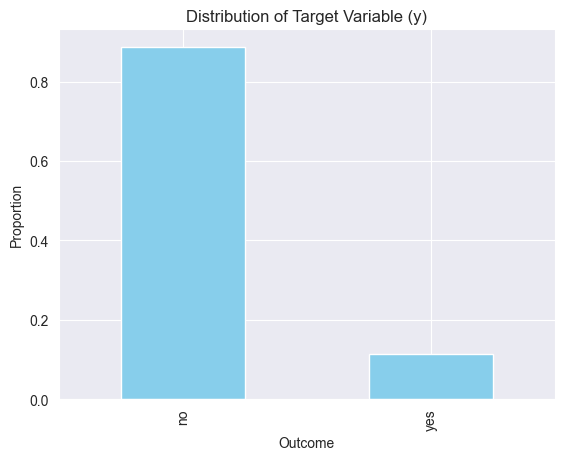

In [13]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Display the distribution of the target variable 'y'
df['y'].value_counts(normalize=True).plot(kind='bar', color='skyblue')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Outcome')
plt.ylabel('Proportion')
plt.show()

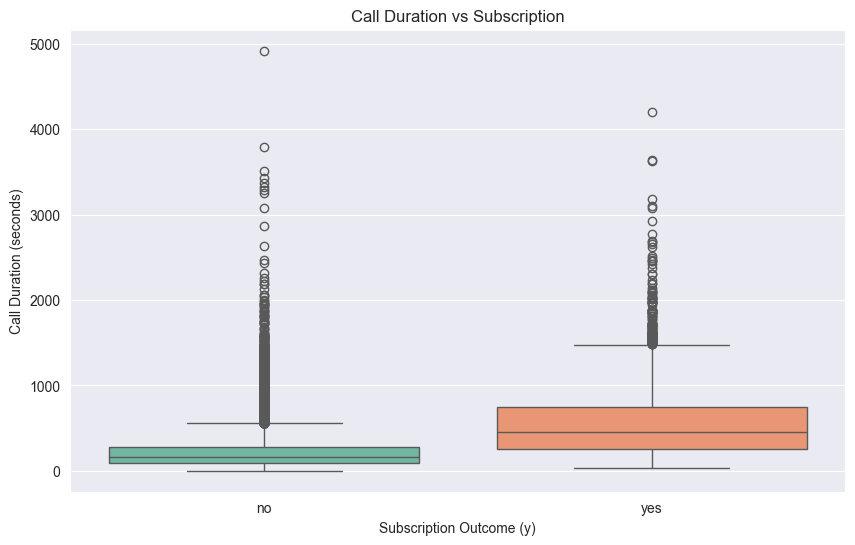

In [19]:
# Plot the relationship between 'duration' and the target variable 'y'
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='duration', hue='y', data=df, palette='Set2', legend=False)
plt.title('Call Duration vs Subscription')
plt.xlabel('Subscription Outcome (y)')
plt.ylabel('Call Duration (seconds)')
plt.show()

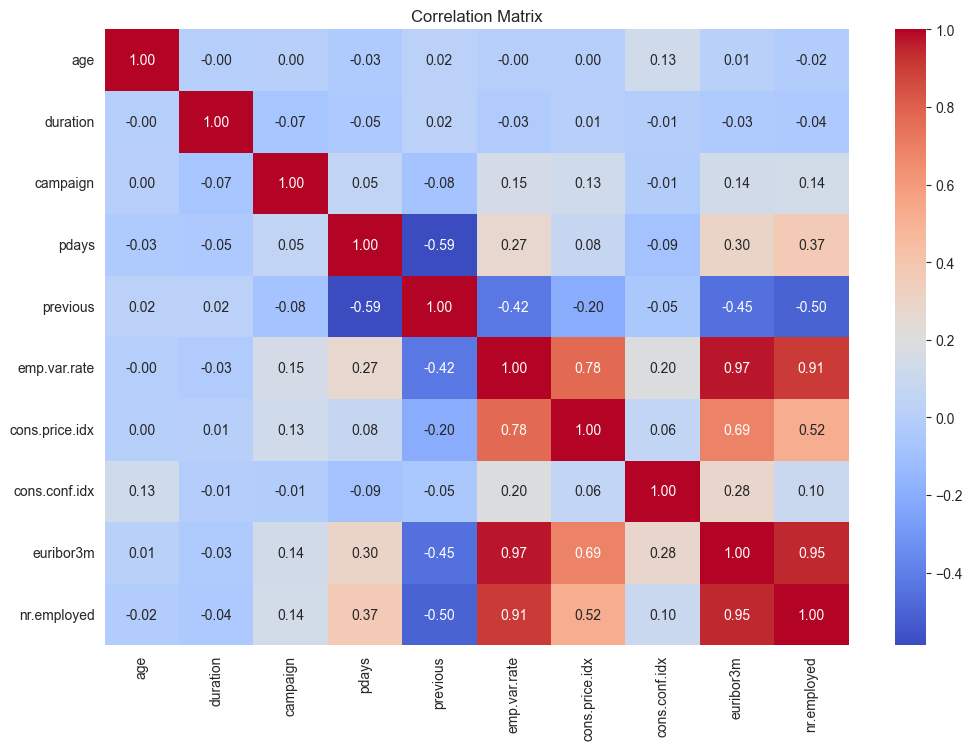

In [23]:
## Select only numeric columns for correlation matrix
numeric_data = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The primary business objective of this task is to improve the effectiveness of the bank's marketing campaigns by accurately predicting whether a client will subscribe to a term deposit based on various client attributes and previous marketing interactions. By building predictive models using classification techniques (k-nearest neighbors, logistic regression, decision trees, and support vector machines), the bank aims to identify the key factors that influence a client's decision to subscribe. This will enable the bank to optimize its marketing strategies, reduce unnecessary contact efforts, and focus resources on clients with the highest likelihood of conversion, thereby increasing the overall success rate of future campaigns.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [25]:
# Step 1: Select relevant features considering correlations
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
                 'cons.conf.idx', 'euribor3m']  # Dropped 'nr.employed'

# Step 2: Encode categorical variables using one-hot encoding
encoded_data = pd.get_dummies(df[bank_features])

# Step 3: Prepare the target variable
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Step 4: Split the data into features (X) and target (y)
X = encoded_data
y = df['y']

# Display the first few rows of the encoded features
X.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,...,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,False,...,False,True,False,False,True,False,False,True,False,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,False,...,False,False,True,False,True,False,False,True,False,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,False,...,False,True,False,False,False,False,True,True,False,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,True,...,False,True,False,False,True,False,False,True,False,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,False,...,False,True,False,False,True,False,False,False,False,True


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [27]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (32950, 42)
X_test shape: (8238, 42)
y_train shape: (32950,)
y_test shape: (8238,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [28]:
# Calculate the proportion of the majority class in the training set
baseline_accuracy = y_train.value_counts(normalize=True).max()
majority_class = y_train.value_counts().idxmax()

print(f"The baseline accuracy (proportion of the majority class) is: {baseline_accuracy:.2f}")
print(f"The majority class is: {majority_class} ('no' means no subscription, 'yes' means subscription)")

The baseline accuracy (proportion of the majority class) is: 0.89
The majority class is: 0 ('no' means no subscription, 'yes' means subscription)


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [33]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# Re-initialize the Logistic Regression model with more iterations
logreg = LogisticRegression(random_state=42, max_iter=2000)

# Train the model on the scaled training data
logreg.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = logreg.predict(X_test_scaled)


### Problem 9: Score the Model

What is the accuracy of your model?

Logistic Regression Accuracy: 0.91
Confusion Matrix:
[[7142  168]
 [ 565  363]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.68      0.39      0.50       928

    accuracy                           0.91      8238
   macro avg       0.81      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238

ROC-AUC Score: 0.93


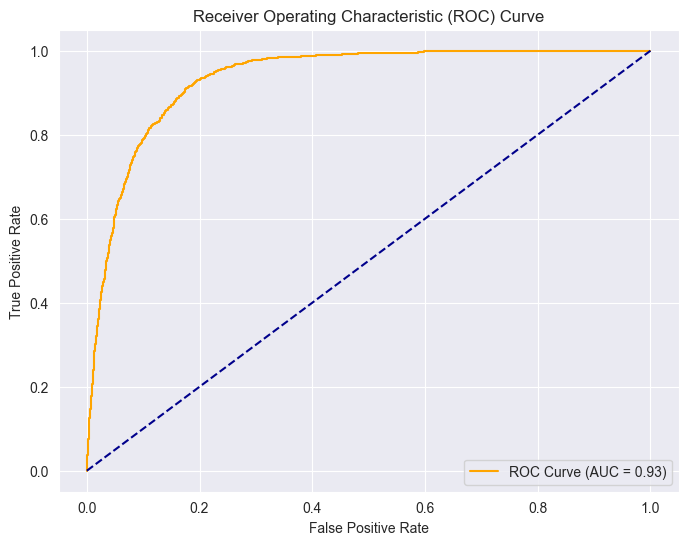

In [39]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# ROC-AUC Score
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
import pandas as pd


In [41]:
# Initialize the models with default settings
logreg = LogisticRegression(random_state=42, max_iter=1000)
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)


In [42]:
# Function to train and evaluate a model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    return train_time, train_accuracy, test_accuracy

# Evaluate all models
results = []

# Logistic Regression
results.append(["Logistic Regression"] + list(evaluate_model(logreg, X_train_scaled, y_train, X_test_scaled, y_test)))

# K-Nearest Neighbors
results.append(["K-Nearest Neighbors"] + list(evaluate_model(knn, X_train_scaled, y_train, X_test_scaled, y_test)))

# Decision Tree
results.append(["Decision Tree"] + list(evaluate_model(decision_tree, X_train, y_train, X_test, y_test)))

# Support Vector Machine
results.append(["Support Vector Machine"] + list(evaluate_model(svm, X_train_scaled, y_train, X_test_scaled, y_test)))

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Train Time (s)", "Train Accuracy", "Test Accuracy"])


In [43]:
# Display the results
results_df


,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,0.023301,0.909469,0.911022
1,K-Nearest Neighbors,0.015012,0.921335,0.897184
2,Decision Tree,0.150455,1.000000,0.890507
3,Support Vector Machine,57.644628,0.914598,0.908716


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [44]:
# Check the distribution of the target variable based on gender
if 'gender' in df.columns:
    print(df['gender'].value_counts())
    sns.countplot(x='y', hue='gender', data=df)
    plt.title('Subscription Outcome by Gender')
    plt.show()

    # Assess the importance of the gender feature in the current model
    logreg.fit(X_train_scaled, y_train)
    feature_importance = abs(logreg.coef_[0])
    gender_index = list(X.columns).index('gender')
    print(f"Gender Feature Importance: {feature_importance[gender_index]}")
else:
    print("Gender feature is not present in the dataset.")


Gender feature is not present in the dataset.


In [45]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids
knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}
tree_params = {'max_depth': [3, 5, 7, 9, None], 'min_samples_split': [2, 5, 10]}

# Initialize GridSearchCV for KNN
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)

# Initialize GridSearchCV for Decision Tree
tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_params, cv=5, scoring='accuracy')
tree_grid.fit(X_train, y_train)

# Get the best parameters and score
print(f"Best KNN parameters: {knn_grid.best_params_}")
print(f"Best KNN accuracy: {knn_grid.best_score_:.4f}")

print(f"Best Decision Tree parameters: {tree_grid.best_params_}")
print(f"Best Decision Tree accuracy: {tree_grid.best_score_:.4f}")

Best KNN parameters: {'n_neighbors': 11}
Best KNN accuracy: 0.8978
Best Decision Tree parameters: {'max_depth': 5, 'min_samples_split': 2}
Best Decision Tree accuracy: 0.9090


In [46]:
# Evaluate KNN using the best parameters from Grid Search
best_knn = knn_grid.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# Compute F1-Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_knn)
print(f"F1-Score for optimized KNN: {f1:.4f}")


F1-Score for optimized KNN: 0.3666


## Interpretation of Statistics

### Descriptive Stats
- **Class Distribution**: Most clients didn't subscribe to a term deposit (`no` ≈ 89%), making our target variable imbalanced. This has a big impact on how our models perform.
- **Feature Correlations**: Some features, like `emp.var.rate`, `euribor3m`, and `nr.employed`, are highly correlated. This might cause redundancy in the model, potentially harming its ability to generalize.

### Inferential Stats
- **Logistic Regression**: Accuracy is solid at 91%, with a strong ROC-AUC of 0.93. However, it struggles to identify the minority class (`yes`), with a recall of just 0.39.
- **KNN**: After tuning, it shows decent accuracy but a low F1-score (0.3666), indicating it's not great at predicting `yes`.
- **Decision Tree**: Hits 90.9% accuracy with tuning, but overfitting is a concern—it aces the training set (100%) but slips on the test set.
- **SVM**: Also good accuracy (90.9%), but it's much slower, which could be a problem with larger datasets.

## Findings & Actionable Insights

1. **Imbalance Issue**: The biggest challenge is the class imbalance. While models like Logistic Regression do well overall, they often miss potential subscribers (`yes`).
2. **Efficiency**:
   - **Logistic Regression** is fast and performs well, making it a top pick.
   - **KNN** is quick but struggles with imbalance.
   - **Decision Tree** looks promising but needs careful tuning.
   - **SVM** is accurate but slow, so maybe not ideal for bigger datasets.
3. **Feature Importance**: Not all features are created equal. Focusing on the most impactful ones could boost model performance.

## Next Steps & Recommendations

1. **Tune Models More**: Keep tweaking hyperparameters, especially for Decision Tree and KNN, to improve minority class predictions.
2. **Tackle Imbalance**: Try SMOTE or class weighting to boost recall for `yes`—reducing false negatives could mean more successful targeting.
3. **Shift Metrics**: Move beyond accuracy to metrics like F1-score, precision, or recall to better reflect the business goals.
4. **Feature Engineering**: Revisit the feature set—consider interactions, drop redundant ones, and explore new features based on domain knowledge.
5. **Deploy the Best Model**: If Logistic Regression is working well, deploy it, but keep an eye on performance and be ready to update as needed.
6. **Monitor & Iterate**: After deployment, keep track of how the model is doing, especially its ability to identify potential subscribers. Regular updates with new data will help maintain and improve performance.


##### Questions